In [1]:
import numpy as np


np.random.seed(42)

In [2]:
from typing import List
from typing import Tuple

import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
n_points = 100


# Toy Dataset
def generate_dataset():
    data = np.concatenate(
        (np.random.normal(1, 2, n_points), np.random.normal(8, 2, n_points))
    )
    classes = [0 for i in range(n_points)] + [1 for i in range(n_points)]
    return data, classes

In [4]:
x, y = generate_dataset()

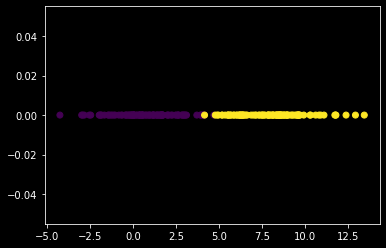

In [5]:
plt.scatter(x, [0 for i in range(2 * n_points)], c=y)
plt.show()

In [6]:
class GaussianMixtureModel:
    def __init__(self, n_cluster: int = 8, max_iter: int = 1_000):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.gaussians: List[Tuple[float, float, float]] = []

    def prob(self, point: np.ndarray, gaussian: Tuple[float, float, float]):
        p = norm.pdf(point, gaussian[0], gaussian[1])
        return p

    def fit(self, x: np.ndarray):
        N = x.shape[0]
        # Init our model
        self.gaussians = [[] for _ in range(self.n_cluster)]
        self.cluster_probs = np.zeros((N, self.n_cluster))
        for c in range(self.n_cluster):
            mean = np.random.choice(x)
            std = 2.0
            prob = 1 / self.n_cluster
            self.gaussians[c] = [mean, std, prob]

        # Start training
        for _ in range(self.max_iter):
            # Step 1: Expectation
            for i, point in enumerate(x):
                for c in range(self.n_cluster):
                    self.cluster_probs[i][c] = self.gaussians[c][2] * self.prob(
                        point, self.gaussians[c]
                    )
                self.cluster_probs[i] /= np.sum(self.cluster_probs[i])

            # Step 2: Maximization
            for c in range(self.n_cluster):
                self.gaussians[c][0] = np.average(
                    x, weights=self.cluster_probs[:, c]
                )
                # Cluster std
                self.gaussians[c][1] = 2.0
                # Cluster prob
                self.gaussians[c][2] = np.mean(self.cluster_probs[:, c])
        return self.gaussians

In [7]:
n_cluster = 2
max_iter = 1_000

gmm = GaussianMixtureModel(n_cluster=n_cluster, max_iter=max_iter)
gaussians = gmm.fit(x)
means = [gaussians[0][0], gaussians[1][0]]

print(f"True Mean 1: {1}")
print(f"True Mean 2: {8}")

print(f"Estimate Mean 1: {means[0]}")
print(f"Estimate Mean 2: {means[1]}")

True Mean 1: 1
True Mean 2: 8
Estimate Mean 1: 7.9725231776521115
Estimate Mean 2: 0.8261708389850709


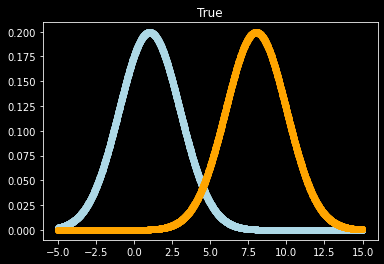

In [8]:
y1 = [norm.pdf(xi, 1, 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01), y1, color="lightblue")

y2 = [norm.pdf(xi, 8, 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01), y2, color="orange")
plt.title("True")
plt.show()

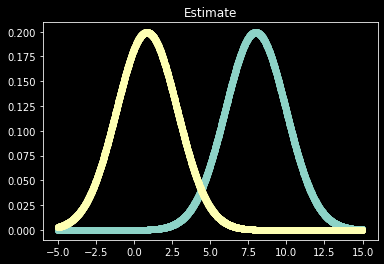

In [9]:
y1 = [norm.pdf(xi, means[0], 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01), y1)

y2 = [norm.pdf(xi, means[1], 2) for xi in np.arange(-5, 15, 0.01)]
plt.scatter(np.arange(-5, 15, 0.01), y2)
plt.title("Estimate")
plt.show()